In [1]:
# Import necessary libraries

from transformers import BlipProcessor, BlipForQuestionAnswering
from PIL import Image
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define the model and processor configuration

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

In [3]:
# Alternative model(large) and processor configuration (comment/uncomment as needed)

#processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-capfilt-large")
#model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-capfilt-large")

In [4]:
# Function to generate captions
def generate_caption(image_path, text):
    """
    Generate an answer to a question about an image.

    Args:
        image_path (str): The path to the image file.
        question (str): The question to ask about the image.

    Returns:
        str: The generated answer to the question.
    """
    
    # Load and preprocess the image from a local file
    with Image.open(image_path).convert('RGB') as image:
        inputs = processor(image, text, return_tensors="pt")
    
    # Generate the caption
    output = model.generate(**inputs)

    # Decode and return the caption
    caption = processor.decode(output[0], skip_special_tokens=True)

    return caption

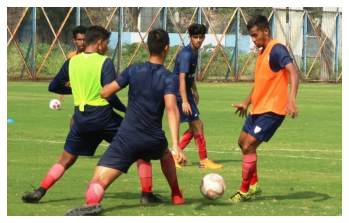

In [5]:
# Define the path to your image
image_path = r"C:\Users\HP\Desktop\Scene Detector\Test Images\scene1.jpg"

# Open the image using PIL (Python Imaging Library)
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [6]:
# Define a question about the image
question = "is it raining?"

# Generate and print the answer to the question about the image
generate_caption(image_path, question)

'no'

In [7]:
generate_caption(image_path, text="which game are they playing?")

'soccer'

In [8]:
generate_caption(image_path, text="how many players are there?")

'5'